In [1]:
%load_ext autoreload
%autoreload 2

### Test original Gibbs Sampling

Gibbs Sampling:  10%|█         | 1/10 [00:01<00:15,  1.71s/iter]

Check Theta: [0.2757654  0.26810712 0.26754437 0.26065961 0.25167406 0.00655166
 0.00619829 0.00526558]


Gibbs Sampling:  20%|██        | 2/10 [00:03<00:13,  1.67s/iter]

Check Theta: [2.81211292e-001 2.71460300e-001 2.62837771e-001 2.59685338e-001
 2.56790807e-001 1.71873586e-114 2.40241583e-137 6.24818093e-146]


Gibbs Sampling:  30%|███       | 3/10 [00:05<00:12,  1.73s/iter]

Check Theta: [0.26636061 0.26324151 0.25974935 0.25905405 0.24839723 0.
 0.         0.        ]


Gibbs Sampling:  40%|████      | 4/10 [00:06<00:10,  1.73s/iter]

Check Theta: [0.27322465 0.26505703 0.26228994 0.25893077 0.25827886 0.
 0.         0.        ]


Gibbs Sampling:  50%|█████     | 5/10 [00:08<00:08,  1.73s/iter]

Check Theta: [0.26580409 0.2598754  0.25609698 0.25574942 0.24447622 0.
 0.         0.        ]


Gibbs Sampling:  60%|██████    | 6/10 [00:10<00:06,  1.69s/iter]

Check Theta: [0.2664743  0.26011292 0.25890188 0.25471403 0.24787232 0.
 0.         0.        ]


Gibbs Sampling:  70%|███████   | 7/10 [00:11<00:05,  1.71s/iter]

Check Theta: [0.27122293 0.26124552 0.25265487 0.25132855 0.2490249  0.
 0.         0.        ]


Gibbs Sampling:  80%|████████  | 8/10 [00:13<00:03,  1.69s/iter]

Check Theta: [0.2685644  0.26173679 0.25249439 0.25170198 0.249383   0.
 0.         0.        ]


Gibbs Sampling:  90%|█████████ | 9/10 [00:15<00:01,  1.74s/iter]

Check Theta: [0.26844964 0.26614005 0.259846   0.24775486 0.24374512 0.
 0.         0.        ]


Gibbs Sampling: 100%|██████████| 10/10 [00:17<00:00,  1.72s/iter]


Check Theta: [0.27050802 0.26685225 0.26326568 0.25735002 0.24541109 0.
 0.         0.        ]


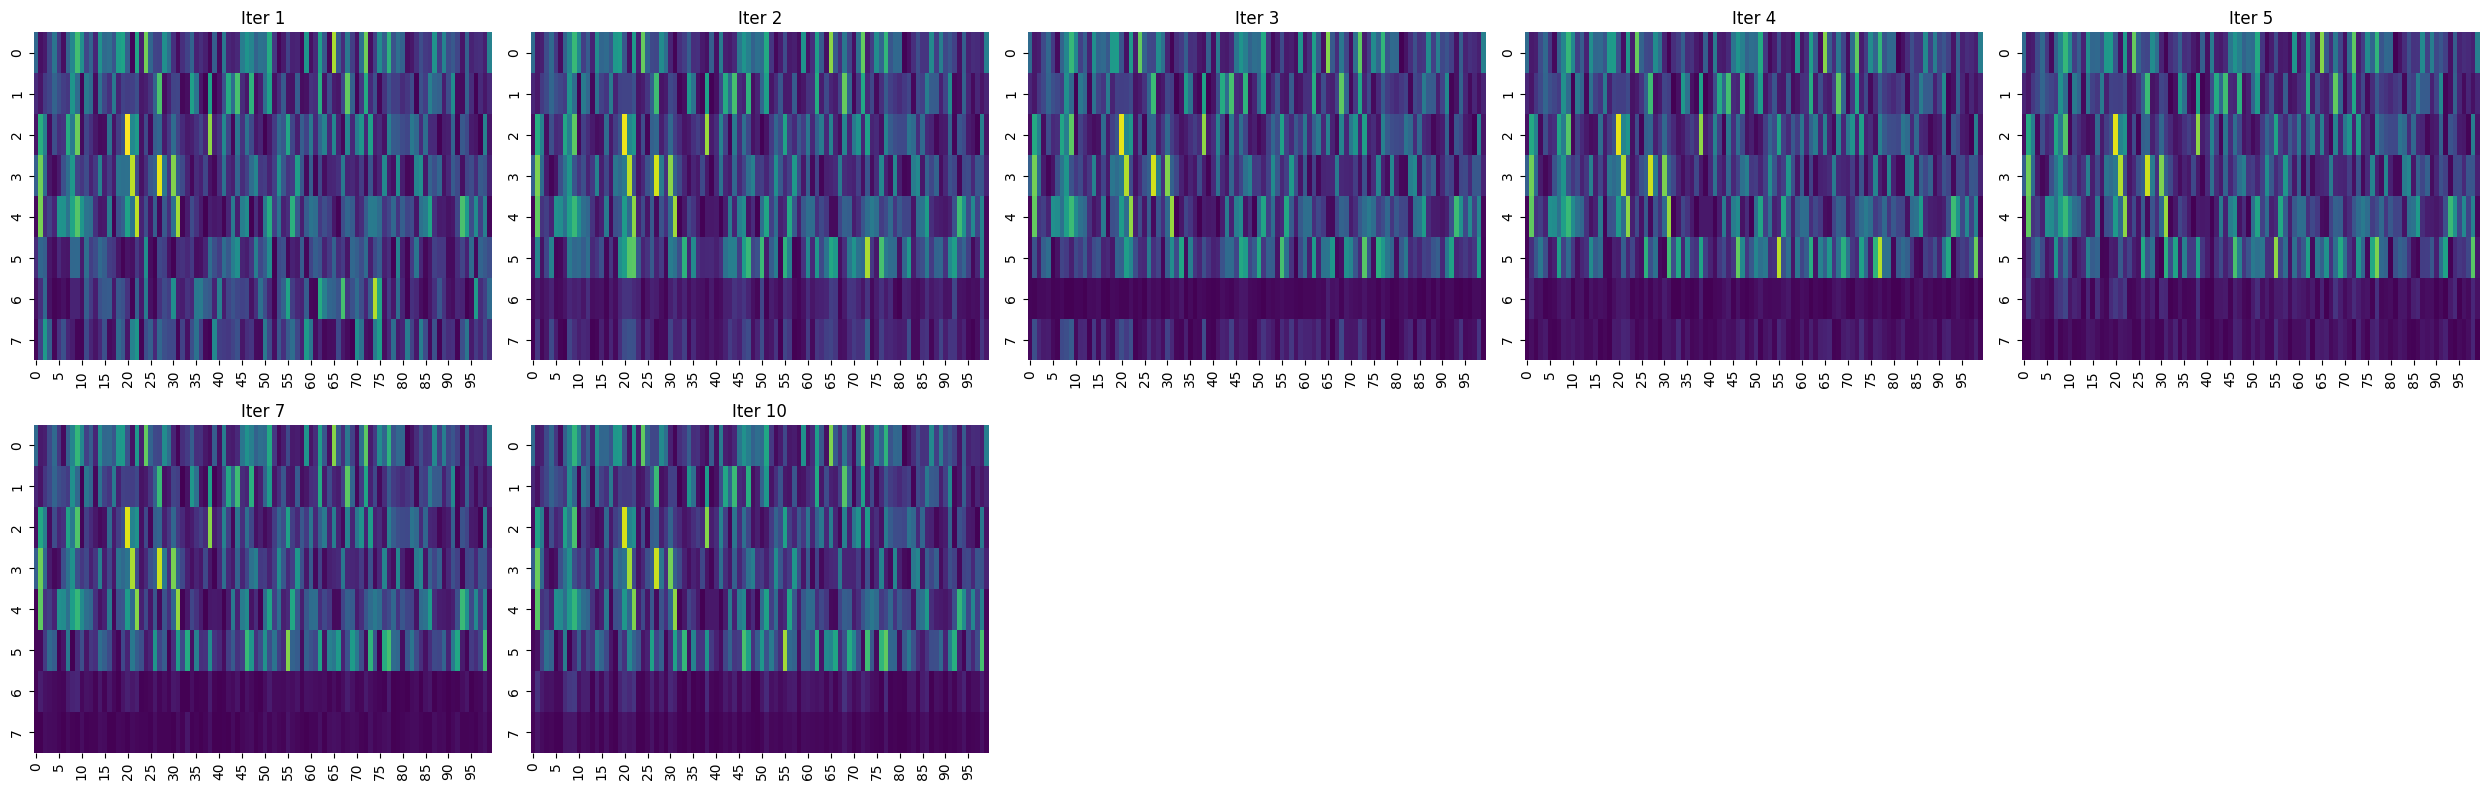

In [47]:
import numpy as np

from src.simulations.normal_bayesian_factor_dgp import NormalBayesianFactorDGP
from src.sampling.normal_factor_gibbs import SpSlNormalFactorGibbs

from src.utils.setup.create_true_loadings import create_true_loadings

# Force Random Seed
np.random.seed(42)

# Normal Factor Bayesian Dimensions
num_sim = 100
num_variables = 1956
num_factors = 8

# True Loadings Settings
block_size = 500
overlap = 136
random = False
mean = 1
std = 5

# Hyperparameters
alpha = 1 / num_variables
eta = 1
epsilon = 1
lambda0 = 20
lambda1 = 0.1


# True Parameters
BTrue = create_true_loadings(
    num_factors=num_factors,
    num_variables=num_variables,
    block_size=block_size,
    overlap=overlap,
    random=random,
    mean=mean,
    std=std,
)

SigmaTrue = np.ones(
    num_variables
)  # TODO define a function to create_true_covariance either random or not

# Initial Latent Parameters
Gamma0 = create_true_loadings(
    num_factors=num_factors,
    num_variables=num_variables,
    block_size=block_size,
    overlap=overlap,
)

Theta0 = np.full(num_factors, 0.5)

# Simulated Value for Y
DataGeneratingProcess = NormalBayesianFactorDGP(B=BTrue, Sigma=SigmaTrue)

Y_sim = DataGeneratingProcess.simulate(size=num_sim)

# Initiate Bayesian Normal Factor Gibbs Sampler
SparseGibbsSampling = SpSlNormalFactorGibbs(
    Y=Y_sim,
    B=BTrue,
    Sigma=SigmaTrue,
    Gamma=Gamma0,
    Theta=Theta0,
    alpha=alpha,
    eta=eta,
    epsilon=epsilon,
    lambda0=lambda0,
    lambda1=lambda1,
)

# Perform Gibbs Sampler for posterior
SparseGibbsSampling.perform_gibbs(iterations=10)


<Axes: >

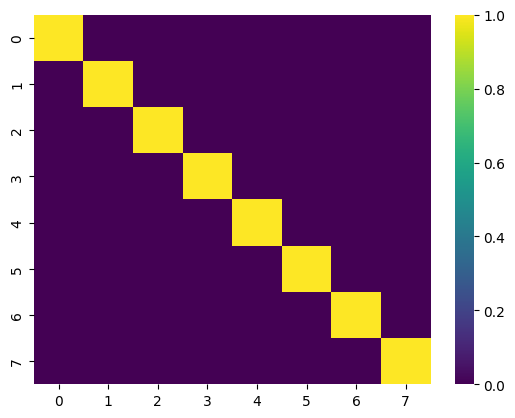

In [103]:
O = OrthoSampling.paths["init"]["Omega"]

I = O @ O.T / num_sim

sns.heatmap(I, cmap = "viridis")

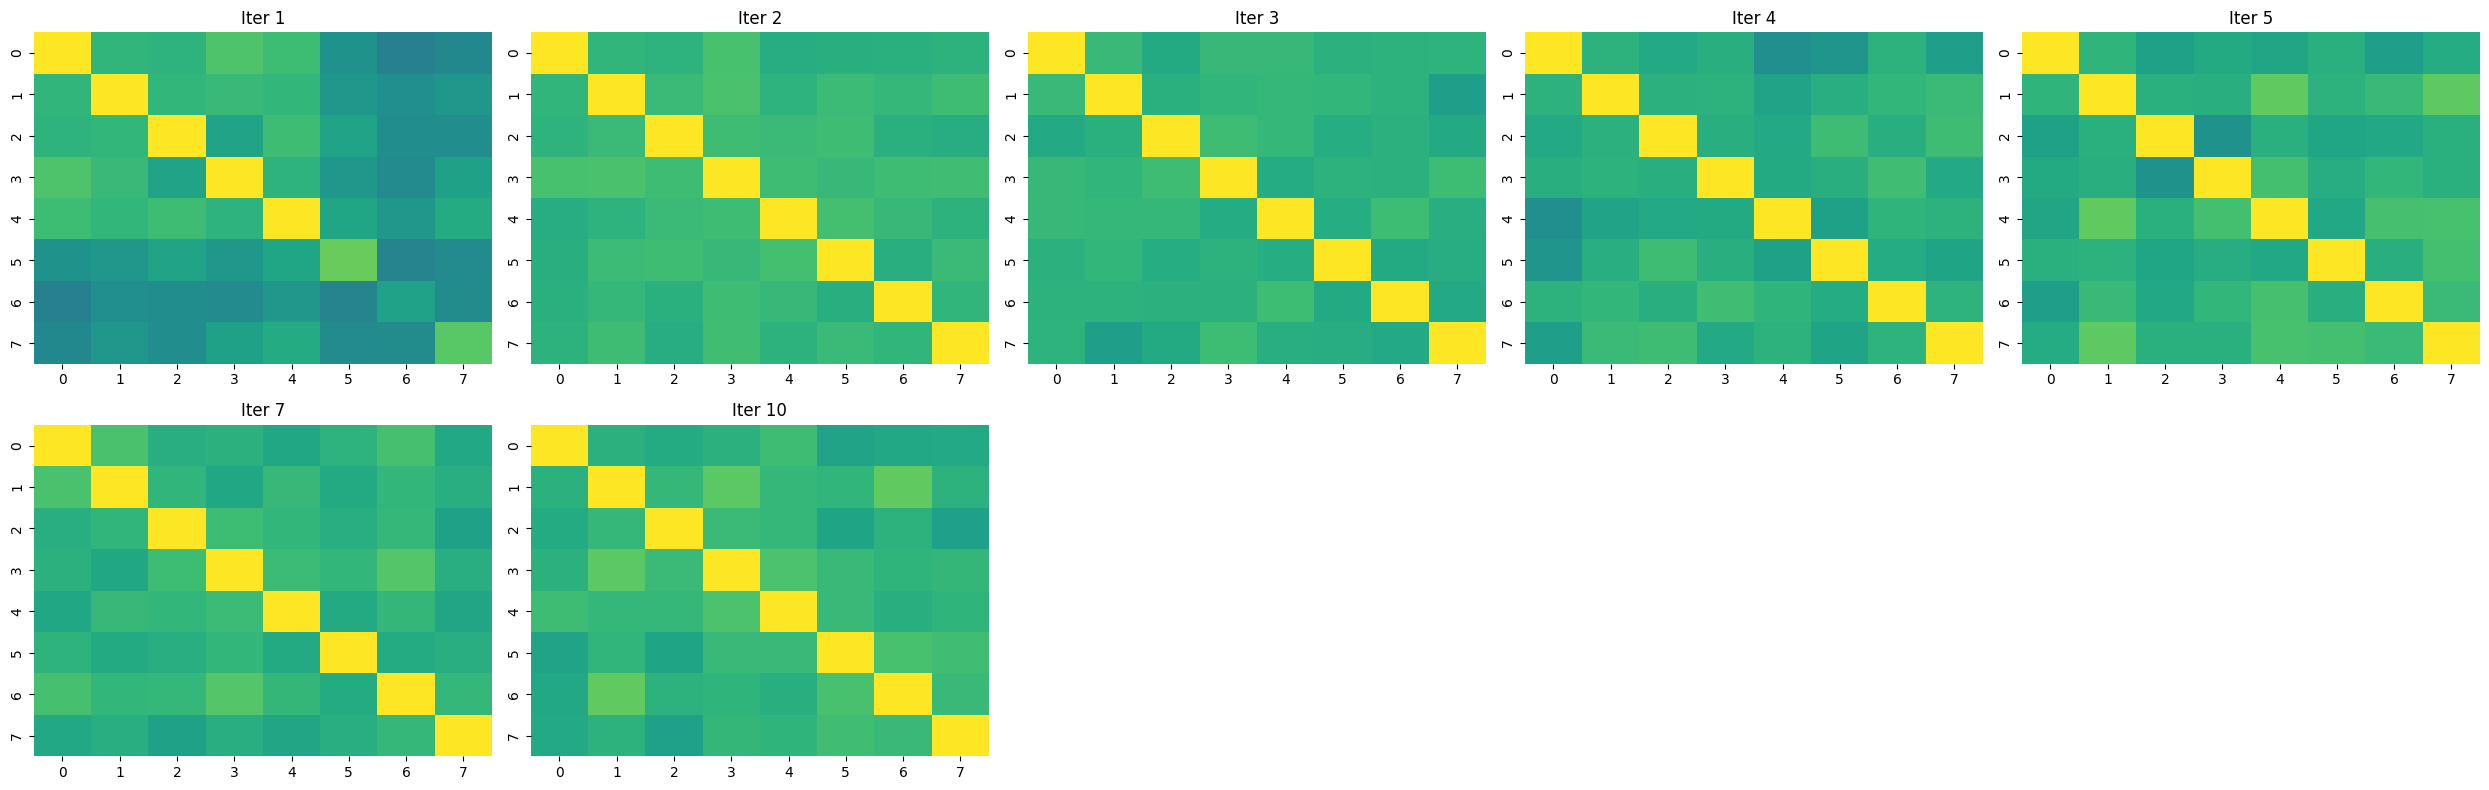

The quantity is not initialized before the first loop. Take vmin = 0, vmax = 1


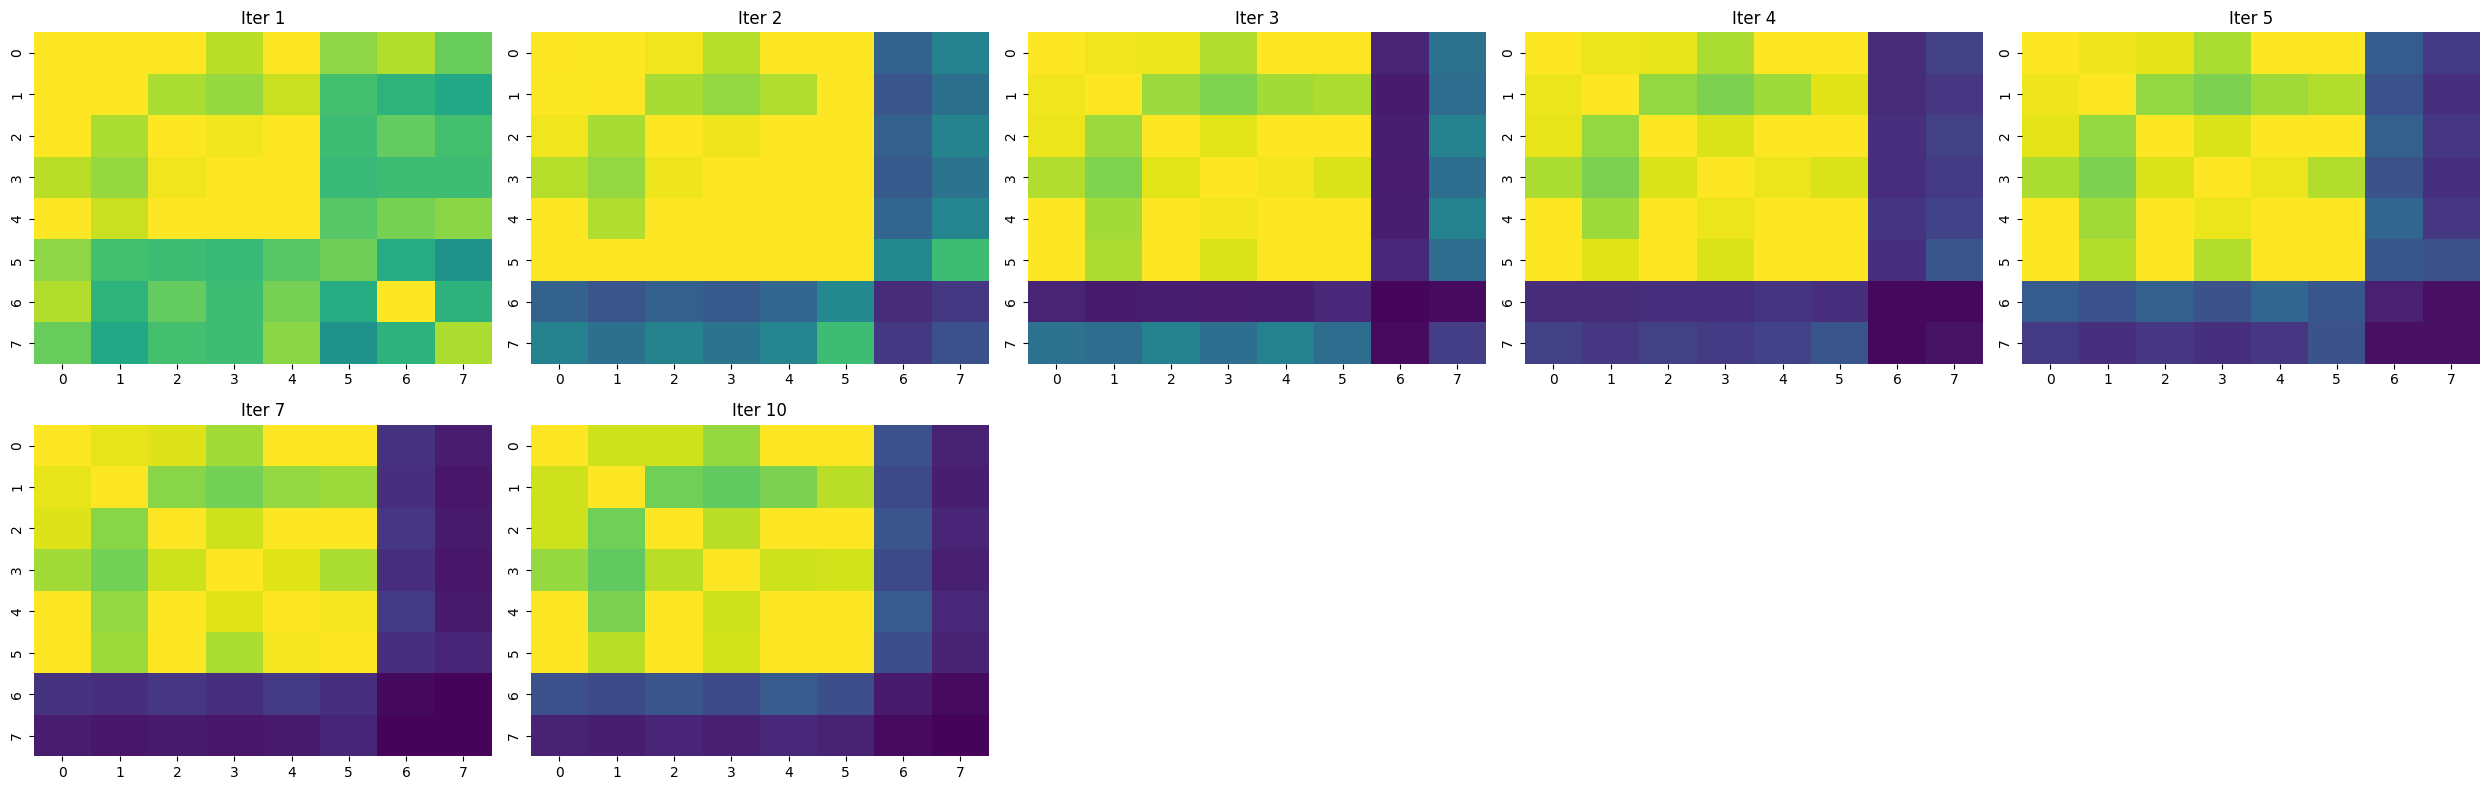

In [107]:
name = "Omega"
def transform(matrix, cl):
    return matrix @ matrix.T / cl.num_obs
OrthoSampling.plot_heatmaps(str_param=name, transform=transform)
SparseGibbsSampling.plot_heatmaps(str_param=name, transform=transform)

Gibbs Sampling:  10%|█         | 1/10 [00:04<00:38,  4.28s/iter]

Check Theta: [0.27069104 0.26781202 0.26128342 0.26040952 0.25307925 0.01146186
 0.00715356 0.00592877]


Gibbs Sampling:  20%|██        | 2/10 [00:06<00:23,  2.88s/iter]

Check Theta: [1.00000000e+000 5.43495389e-001 5.45919453e-001 1.00000000e+000
 2.54978215e-001 6.38227862e-003 1.05181934e-008 7.58521035e-233]


Gibbs Sampling:  30%|███       | 3/10 [00:08<00:17,  2.45s/iter]

Check Theta: [9.99898317e-01 4.62103431e-01 1.25743384e-01 0.00000000e+00
 1.04433550e-01 8.17748776e-04 0.00000000e+00 0.00000000e+00]


Gibbs Sampling:  40%|████      | 4/10 [00:10<00:13,  2.27s/iter]

Check Theta: [9.99718365e-01 3.89692227e-01 3.44889319e-03 0.00000000e+00
 0.00000000e+00 2.93778447e-04 0.00000000e+00 0.00000000e+00]


Gibbs Sampling:  50%|█████     | 5/10 [00:12<00:10,  2.16s/iter]

Check Theta: [0.98875115 0.18182928 0.         0.         0.         0.
 0.         0.        ]


Gibbs Sampling:  60%|██████    | 6/10 [00:13<00:08,  2.06s/iter]

Check Theta: [0.82163668 0.02477908 0.         0.         0.         0.
 0.         0.        ]


Gibbs Sampling:  70%|███████   | 7/10 [00:15<00:06,  2.04s/iter]

Check Theta: [0.53605631 0.07023444 0.         0.         0.         0.
 0.         0.        ]


Gibbs Sampling:  80%|████████  | 8/10 [00:17<00:04,  2.01s/iter]

Check Theta: [0.11790364 0.02052962 0.         0.         0.         0.
 0.         0.        ]


Gibbs Sampling:  90%|█████████ | 9/10 [00:19<00:01,  2.00s/iter]

Check Theta: [0.57035108 0.11763066 0.         0.         0.         0.
 0.         0.        ]


Gibbs Sampling: 100%|██████████| 10/10 [00:21<00:00,  2.19s/iter]


Check Theta: [1.         0.50485629 0.         0.         0.         0.
 0.         0.        ]


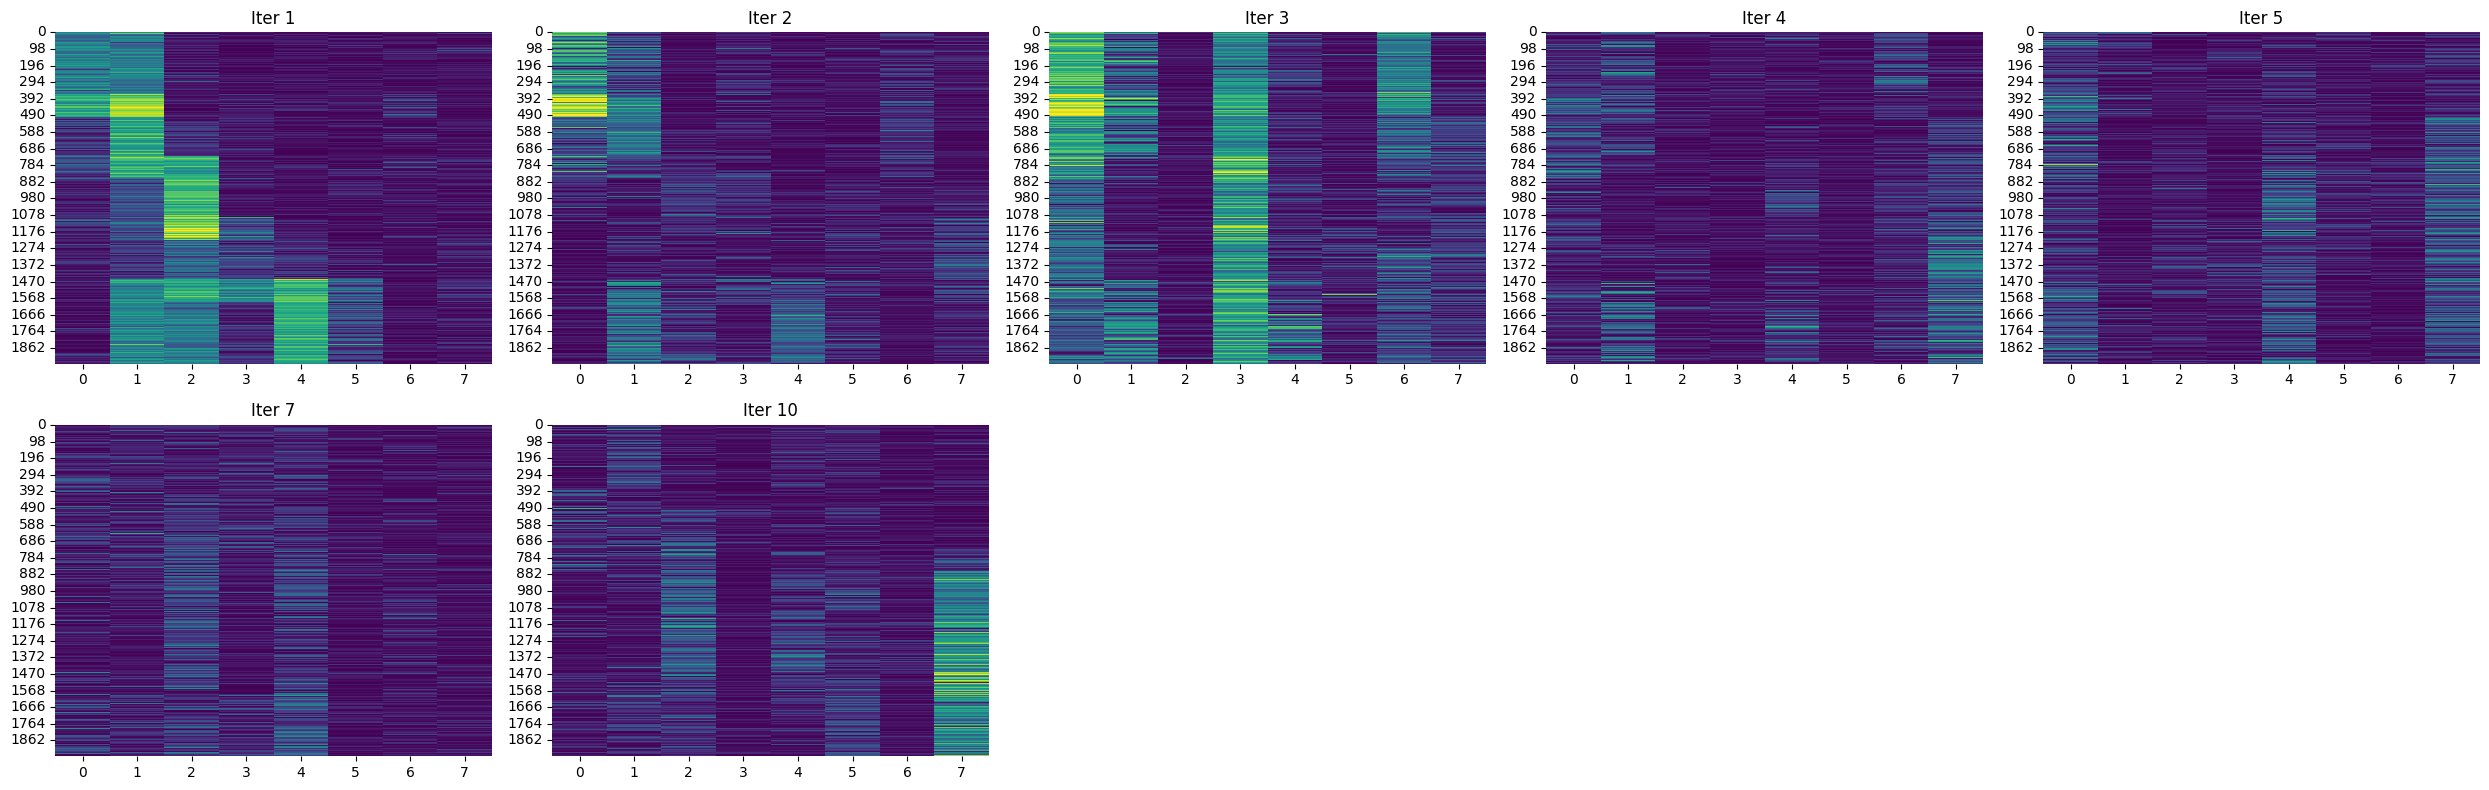

In [99]:
from src.sampling.orthonormal_factor_gibbs import OrthonormalFactorGibbs

# Initiate Bayesian Normal Factor Gibbs Sampler
OrthoSampling = OrthonormalFactorGibbs(
    Y=Y_sim,
    B=BTrue,
    Sigma=SigmaTrue,
    Gamma=Gamma0,
    Theta=Theta0,
    alpha=alpha,
    eta=eta,
    epsilon=epsilon,
    lambda0=lambda0,
    lambda1=lambda1,
)

# Perform Gibbs Sampler for posterior
OrthoSampling.perform_gibbs(iterations=10)

In [45]:
import torch
import numpy as np

from src.simulations.normal_bayesian_factor_dgp import NormalBayesianFactorDGP
from src.sampling.map_estimation import (
    map_estimation,
)
from src.utils.setup.create_true_loadings import create_true_loadings

# Force Random Seed
np.random.seed(42)

# Normal Factor Bayesian Dimensions
num_sim = 100
num_variables = 1956
num_factors = 5
num_factors_pxl_em = 20

# True Loadings Settings
block_size = 500
overlap = 136
random = False
mean = 1
std = 5

# Hyperparameters
alpha = 1 / num_variables
eta = 1
epsilon = 1
lambda0 = 20
lambda1 = 0.1


# True Parameters
BTrue = create_true_loadings(
    num_factors=num_factors,
    num_variables=num_variables,
    block_size=block_size,
    overlap=overlap,
    random=random,
    mean=mean,
    std=std,
)

B_0 = np.random.normal(size = num_factors_pxl_em*num_variables).reshape((num_variables, num_factors_pxl_em))

SigmaTrue = np.ones(
    num_variables
)  # TODO define a function to create_true_covariance either random or not

S_0 = np.ones(num_variables)

# Initial Latent Parameters
Gamma0 = create_true_loadings(
    num_factors=num_factors,
    num_variables=num_variables,
    block_size=block_size,
    overlap=overlap,
)

# Theta0 = np.full(num_factors, 0.5)
Theta0 = 0.5 * np.ones(num_factors_pxl_em)
# Simulated Value for Y
DataGeneratingProcess = NormalBayesianFactorDGP(B=BTrue, Sigma=SigmaTrue)

Y_sim = DataGeneratingProcess.simulate(size=num_sim)

# print(BTrue.shape, SigmaTrue.shape, Theta0.shape, Y_sim.shape)


B = torch.tensor(B_0)
Sigma = torch.tensor(S_0)
Theta = torch.tensor(Theta0)
Y = torch.tensor(Y_sim)

B_map, Sigma_map, Theta_map = map_estimation(
    B,
    Sigma,
    Theta,
    Y,
    alpha,
    lambda0,
    lambda1,
    epsilon,
    num_variables,
    num_sim,
    num_factors_pxl_em,
    convergence_criterion = 0.05,
    forced_stop = 50,
)


Distance: 1.3045648336410522 at step 1
Distance: 1.061469316482544 at step 2
Distance: 10.208272933959961 at step 3
Distance: 9.020069122314453 at step 4
Distance: 0.7767689824104309 at step 5
Distance: 0.9874359965324402 at step 6
Distance: 0.8724055290222168 at step 7
Distance: 1.1712865829467773 at step 8
Distance: 2.884103298187256 at step 9
Distance: 1.588841438293457 at step 10
Distance: 1.438486933708191 at step 11
Distance: 1.2646410465240479 at step 12
Distance: 0.31290724873542786 at step 13
Distance: 0.5192260146141052 at step 14
Distance: 0.3276336193084717 at step 15
Distance: 0.6374067068099976 at step 16
Distance: 0.45395398139953613 at step 17
Distance: 0.5198327302932739 at step 18
Distance: 0.614749014377594 at step 19
Distance: 0.6522762775421143 at step 20
Distance: 0.5417044162750244 at step 21
Distance: 1.0759961605072021 at step 22
Distance: 0.6975670456886292 at step 23
Distance: 0.6082291007041931 at step 24
Distance: 0.567391037940979 at step 25
Distance: 0.83

<Axes: >

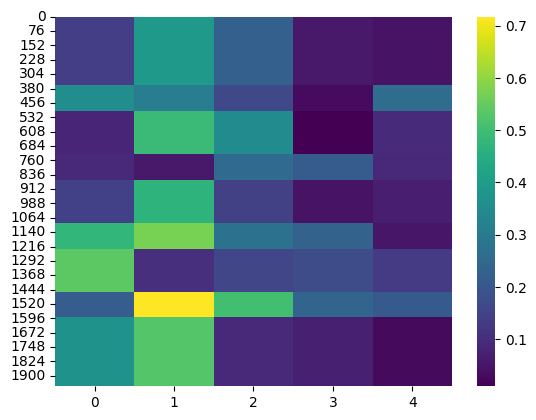

In [49]:
import seaborn as sns

sns.heatmap(torch.abs(B_map[:, :5]), cmap = "viridis")
# sns.heatmap(np.abs(BTrue), cmap = "viridis")

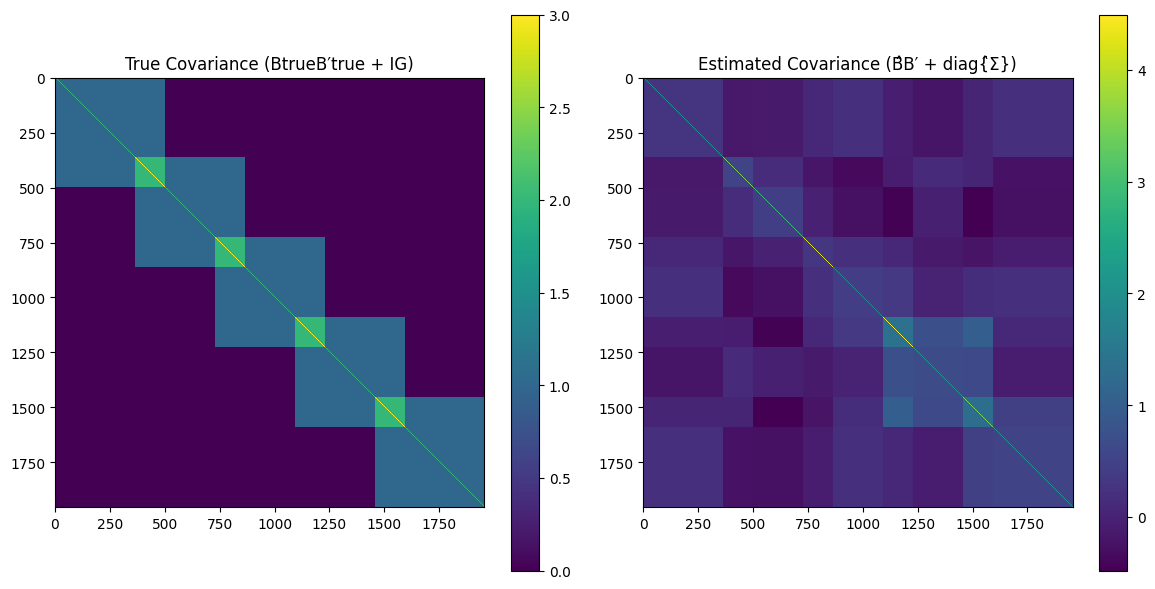

In [47]:
import torch
import numpy as np
import matplotlib.pyplot as plt


# Compute the matrices
true_cov = BTrue @ BTrue.T + np.eye(num_var)  # BtrueB′true + IG
est_cov = B_map @ B_map.T + torch.diag(Sigma_map)  # B̂B′ + diag{̂Σ}

# Convert to NumPy for plotting
true_cov_np = true_cov

est_cov_np = est_cov.numpy()

# Plot the matrices
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# True Covariance
im1 = axs[0].imshow(true_cov_np, cmap="viridis", interpolation="nearest")
axs[0].set_title("True Covariance (BtrueB′true + IG)")
plt.colorbar(im1, ax=axs[0])

# Estimated Covariance
im2 = axs[1].imshow(est_cov_np, cmap="viridis", interpolation="nearest")
axs[1].set_title("Estimated Covariance (B̂B′ + diag{̂Σ})")
plt.colorbar(im2, ax=axs[1])

plt.tight_layout()
plt.show()

